In [21]:
import kagglehub

dataset_path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)

Path to dataset files: /kaggle/input/fer2013


In [22]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

(48, 48, 3)


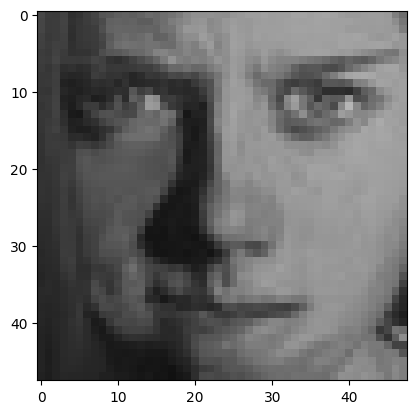

In [23]:
img_array = cv2.imread("/kaggle/input/fer2013/train/angry/Training_11571868.jpg")
plt.imshow(img_array)
print(img_array.shape)

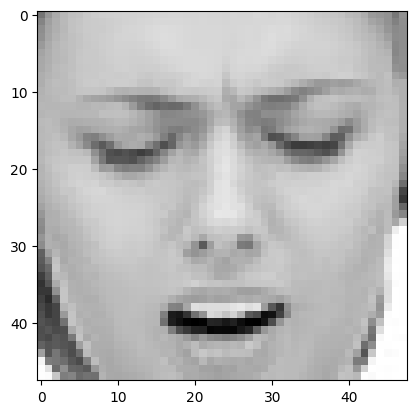

In [24]:
classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
training_path = f"{dataset_path}/train"
test_path = f"{dataset_path}/test"

for c in classes:
    path = os.path.join(training_path, c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

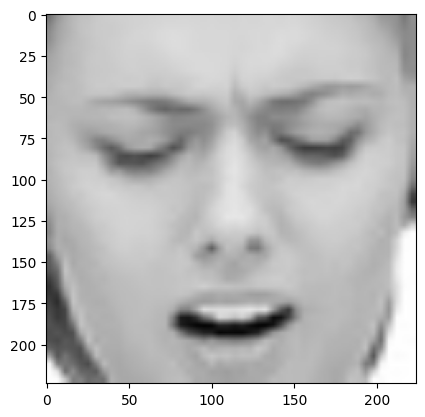

(224, 224, 3)


In [25]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()
print(new_array.shape)

Reading all images

In [26]:
training_Data = []

for c in classes:
    path = os.path.join(training_path, c)
    class_num = classes.index(c)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            training_Data.append([new_array, class_num])
        except Exception as e:
            pass

print(len(training_Data))

28709


In [27]:
import random
random.shuffle(training_Data) # deep learning model should not learn the sequence fromn the initial dataset

In [28]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
print(X.shape)

(28709, 224, 224, 3)


In [29]:
X = X/255.0
Y = np.array(y)
print(Y.shape)

(28709,)


Deep Learning Model - Transfer Learning

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
model = tf.keras.applications.MobileNetV2()

In [32]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [33]:
base_input = model.input
base_output = model.layers[-2].output
print(base_output)

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_315>


In [34]:
final_output = layers.Dense(128)(base_output) # adding new layers after the output of global pooling layer
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) # there are seven possible classes of emotions
print(final_output)

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_321>


In [35]:
print(base_input)

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_161>


In [36]:
final_model = keras.Model(inputs=base_input, outputs=final_output)
final_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,340,423 (8.93 MB)

 Trainable params: 2,306,311 (8.80 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [37]:
final_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# clear memory before training
import gc
gc.collect()

X = X[:15000] # reducing size for ease of computation with current resources
Y = Y[:15000] # reducing size for ease of computation with current resources

# Model Training
final_model.fit(X, Y, epochs=25, batch_size=32)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 66ms/step - accuracy: 0.4477 - loss: 1.4486
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5830 - loss: 1.1170
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6187 - loss: 1.0201
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.6547 - loss: 0.9322
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.6869 - loss: 0.8642
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.6986 - loss: 0.8166
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.7200 - loss: 0.7524
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7510 - loss: 0.6704
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.7829 - loss: 0.6033
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8045 - loss: 0.5460
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8277 - loss: 0.4802
Epoch 12/25
469/469 ━━━━━━━━━━

469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step


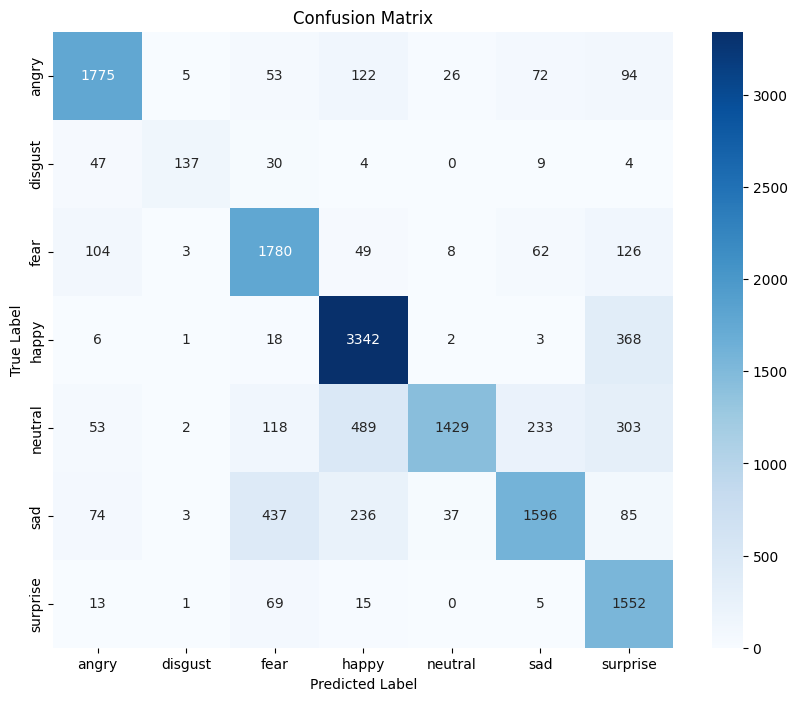

Test Accuracy: 0.7741

Classification Report:
              precision    recall  f1-score   support

       angry       0.86      0.83      0.84      2147
     disgust       0.90      0.59      0.72       231
        fear       0.71      0.83      0.77      2132
       happy       0.79      0.89      0.84      3740
     neutral       0.95      0.54      0.69      2627
         sad       0.81      0.65      0.72      2468
    surprise       0.61      0.94      0.74      1655

    accuracy                           0.77     15000
   macro avg       0.80      0.75      0.76     15000
weighted avg       0.80      0.77      0.77     15000



In [39]:
# Import required libraries for evaluation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate model on test set
Y_pred = final_model.predict(X)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert softmax outputs to class labels

# Compute confusion matrix
cm = confusion_matrix(Y, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Compute and print accuracy
test_accuracy = np.mean(Y_pred_classes == Y)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Compute and print precision, recall, F1 score
report = classification_report(Y, Y_pred_classes, target_names=classes)
print("\nClassification Report:")
print(report)

In [40]:
final_model.save('face_emotion_recognition.h5')